# Combining data from EU CRM and GEA OekoRess II studies 

### Constructing the parameters for the waste stream model

In [101]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [397]:
eol = pd.read_csv('eol-rir_data.csv', sep=',')
sr_ei = pd.read_csv('sr_ei_data.csv', sep=',')
data = pd.read_csv('full_data.csv', sep=',')
data.drop(columns=['Unnamed: 0'],inplace=True)

epi = pd.read_csv('epi_data.csv',sep=',')

In [396]:
data = pd.merge(eol,sr_ei)
data['EOLR'] = data['EOLR']/100
data.to_csv('full_data.csv')


In [379]:
# Convert epi values l,m,h to numeric
num = {'l':0.00,'l-m':0.25,'m':0.5,'m-h':0.75,'h':1.0}
epi = epi.applymap(lambda x: num[x] if x in num else x)



In [381]:
# Find duplicates in data

#duplicates = eol[eol['Material'].duplicated(keep=False)]

In [399]:
# Find differences between 2 columns in 2 different df

# Find namens in eol, that's not in sr_ei
diff_eol = set(eol['Material'])-set(sr_ei['Material'])

diff_epi = set(epi['Material'])-set(data['Material'])
diff_data_epi = set(data['Material'])-set(epi['Material'])

In [403]:
diff_data_epi

{'Aggregates',
 'Arsenic',
 'Baryte',
 'Bentonite',
 'Boron',
 'Cadmium',
 'Diatomite',
 'Feldspar',
 'Hafnium',
 'Helium',
 'Hydrogen',
 'Krypton',
 'Limestone',
 'Natural_Rubber',
 'Natural_Teakwood',
 'Natural_cork',
 'Natural_graphite',
 'Neon',
 'PGM',
 'Perlite',
 'Phosphate_rock',
 'Phosphorus',
 'Potash',
 'Rhenium',
 'Roundwood',
 'Sapele_wood',
 'Scandium',
 'Selenium',
 'Silica',
 'Silicon_metal',
 'Silver',
 'Strontium',
 'Sulphur',
 'Talc',
 'Tantalum',
 'Tellurium',
 'Tin',
 'Titanium',
 'Titanium_metal',
 'Tungsten',
 'Vanadium',
 'Xenon',
 'Zinc',
 'Zirconium'}

In [402]:
# Sort by EOLR
#data_sorted = data.sort_values(by=['EOLR'], axis=0, ascending=False, inplace=False, kind='quicksort')



In [356]:
#critical = data[(data['SR']>=1.0) &(data['EI']>=1.0)]
critical = data


In [357]:
critical = critical[['Material','EOLR','SR','EI']]
norms = critical[['Material','EOLR','SR','EI']]

In [131]:
scaler = StandardScaler()
scaler = MinMaxScaler()

In [329]:
numerical_cols = ['EOLR','SR','EI']

In [133]:
norms[numerical_cols] = scaler.fit_transform(norms[numerical_cols])

In [134]:
TOcluster = norms[numerical_cols]

In [359]:
#dbscan = DBSCAN(eps=0.25, min_samples=3)
#norms['Cluster'] = dbscan.fit_predict(TOcluster)

#print(norms[['Material','Cluster']])

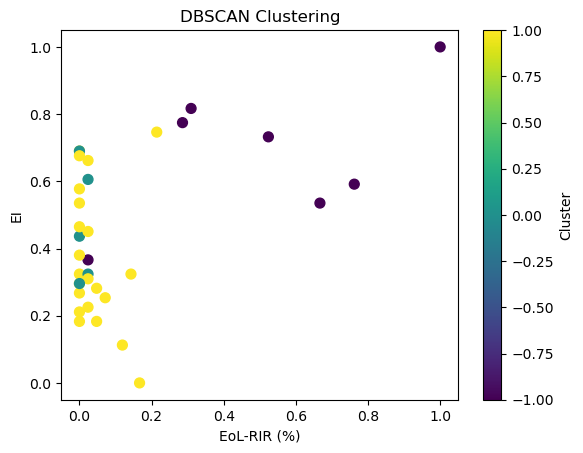

In [139]:
# Visualize (if 2D or 3D data)
plt.scatter(norms['EoL-RIR (%)'], norms['EI'], c=norms['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('EoL-RIR (%)')
plt.ylabel('EI')
plt.colorbar(label='Cluster')
plt.show()

In [137]:
critical[norms['Cluster']==0]

,Material,EoL-RIR (%),SR,EI
2,Phosphorus,0,3.3,4.7
26,Boron,1,3.6,3.9
27,LREE,1,3.7,5.9
53,Gallium,0,3.9,3.7
59,Niobium,0,4.4,6.5


In [371]:
# Criticality factor
critical['Criticality'] = (critical['EOLR'])+critical['SR']+((critical['EI']))

In [372]:
criticality_sorted = critical.sort_values(by=['Criticality'], axis=0, ascending=False, inplace=False, kind='quicksort')

In [244]:
# Data for Iron-Based Alloys
iron_alloys_data = {
    "Alloy": ["High-Speed Steel (M2)", "Maraging Steel (Grade 300)", "Tungsten Steel"],
    "Iron": [70, 75, 70],
    "Nickel": [0, 18, 0],
    "Tungsten": [6, 0, 25],
    "Cobalt": [8, 9, 5],
    "Chromium": [4, 0, 0],
    "Vanadium": [2, 0, 0],
    "Titanium": [0, 0.6, 0],
    "Molybdenum": [5, 0.3, 0],
    "Carbon": [1, 0, 0],
}

# Data for Aluminum-Based Alloys
aluminum_alloys_data = {
    "Alloy": ["6061 Aluminum", "Al-Li 2090", "7055 Aluminum"],
    "Aluminium": [97, 90, 91],
    "Magnesium": [1, 0.3, 2],
    "Silicon": [0.6, 0, 0],
    "Copper": [0.3, 2.7, 2],
    "Chromium": [0.2, 0, 0],
    "Lithium": [0, 2.5, 0],
    "Zirconium": [0, 0.1, 0],
    "Zinc": [0, 0, 8],
    "Titanium": [0, 0, 0.2],
}

# Data for Nickel-Based Alloys
nickel_alloys_data = {
    "Alloy": ["Inconel 718"],
    "Nickel": [52],
    "Iron": [18],
    "Chromium": [19],
    "Molybdenum": [3],
    "Niobium": [5],
    "Titanium": [1],
    "Cobalt": [1],
}

# Data for Titanium-Based Alloys
titanium_alloys_data = {
    "Alloy": ["Ti-6Al-4V", "Ti-10V-2Fe-3Al"],
    "Titanium": [89, 86],
    "Aluminum": [6, 3],
    "Vanadium": [4, 10],
    "Iron": [0.25, 2],
}

# Convert to DataFrames
iron_alloys_df = pd.DataFrame(iron_alloys_data).fillna(0).T
aluminium_alloys_df = pd.DataFrame(aluminum_alloys_data).fillna(0).T
nickel_alloys_df = pd.DataFrame(nickel_alloys_data).fillna(0).T
titanium_alloys_df = pd.DataFrame(titanium_alloys_data).fillna(0).T

In [246]:
nickel_alloys_df

,0
Alloy,Inconel 718
Nickel,52
Iron,18
Chromium,19
Molybdenum,3
Niobium,5
Titanium,1
Cobalt,1


In [352]:
M2 = iron_alloys_df.iloc[1:,0]
G300 = iron_alloys_df.iloc[1:,1]
Tungs = iron_alloys_df.iloc[1:,2]

inconel = nickel_alloys_df.iloc[1:,0]

In [353]:
# Merge alloy and it's material params

def merge_alloy_data(material_df,alloy):
    merged_d = pd.merge(material_df,alloy.rename("Composition"), 
                    left_on="Material", 
                    right_index=True, 
                    how="inner")
    return merged_d.astype({'Composition':'float64'})


    

In [373]:
G300_merge = merge_alloy_data(critical,G300)
M2_merge = merge_alloy_data(critical,M2)
inco_merge = merge_alloy_data(critical,inconel)

In [374]:
G300_merge

,Material,EOLR,SR,EI,Criticality,Composition
32,Chromium,0.21,0.7,7.2,8.11,0.0
35,Cobalt,0.22,2.8,6.8,9.82,9.0
39,Molybdenum,0.30,0.8,6.7,7.80,0.3
49,Titanium,0.01,0.5,5.4,5.91,0.6
56,Nickel,0.16,0.5,5.7,6.36,18.0
57,Tungsten,0.42,1.2,8.7,10.32,0.0
60,Vanadium,0.06,2.3,3.9,6.26,0.0


In [365]:
def calculate_weighted_params(df):
    df = df[df['Composition']>0]
    df_ei = df['EI']*df['Criticality']*((df['Composition'])/100)
    df_sr = df['SR']*df['Criticality']*(df['Composition']/100)
    df_eol = df['EOLR']*df['Criticality']*(df['Composition']/100)
    return df_eol.sum().round(3), df_sr.sum().round(3), df_ei.sum().round(3)

In [366]:
G300composite = calculate_weighted_params(G300_merge)
M2composite = calculate_weighted_params(M2_merge)
incocomposite = calculate_weighted_params(inco_merge)

In [367]:
G300composite

(0.416, 3.29, 13.964)

In [368]:
M2composite

(0.651, 3.979, 16.924)

In [369]:
M2_merge

,Material,EOLR,SR,EI,Criticality,Composition
32,Chromium,0.21,0.7,7.2,8.69,4.0
35,Cobalt,0.22,2.8,6.8,10.38,8.0
39,Molybdenum,0.30,0.8,6.7,8.20,5.0
49,Titanium,0.01,0.5,5.4,6.89,0.0
56,Nickel,0.16,0.5,5.7,7.04,0.0
57,Tungsten,0.42,1.2,8.7,10.48,6.0
60,Vanadium,0.06,2.3,3.9,7.14,2.0


In [370]:
G300_merge

,Material,EOLR,SR,EI,Criticality,Composition
32,Chromium,0.21,0.7,7.2,8.69,0.0
35,Cobalt,0.22,2.8,6.8,10.38,9.0
39,Molybdenum,0.30,0.8,6.7,8.20,0.3
49,Titanium,0.01,0.5,5.4,6.89,0.6
56,Nickel,0.16,0.5,5.7,7.04,18.0
57,Tungsten,0.42,1.2,8.7,10.48,0.0
60,Vanadium,0.06,2.3,3.9,7.14,0.0
